## LDA Example
#using dataset NIPS (/Users/sonu/Documents/aiml/assignments/c5/2/papers.csv)

In [1]:
import pandas as pd

In [2]:
papers = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c5/2/papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
papers = papers.drop(columns=['id','event_type','pdf_name'], axis=1)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [16]:
# Clean paper_text column to remove punctuations
import re

papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\!?.]','',x))
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

7241

In [11]:
# wordcloud analysis
!pip install wordcloud

    100% |████████████████████████████████| 163kB 6.2MB/s ta 0:00:01


In [12]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

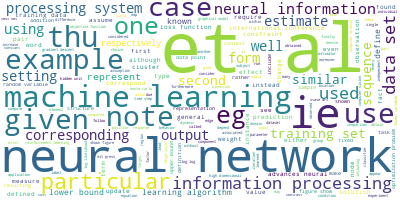

In [13]:
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Step1: Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
count = cv.fit_transform(papers['paper_text_processed'])

# Step2: Analsysi - Plot the histogram of words

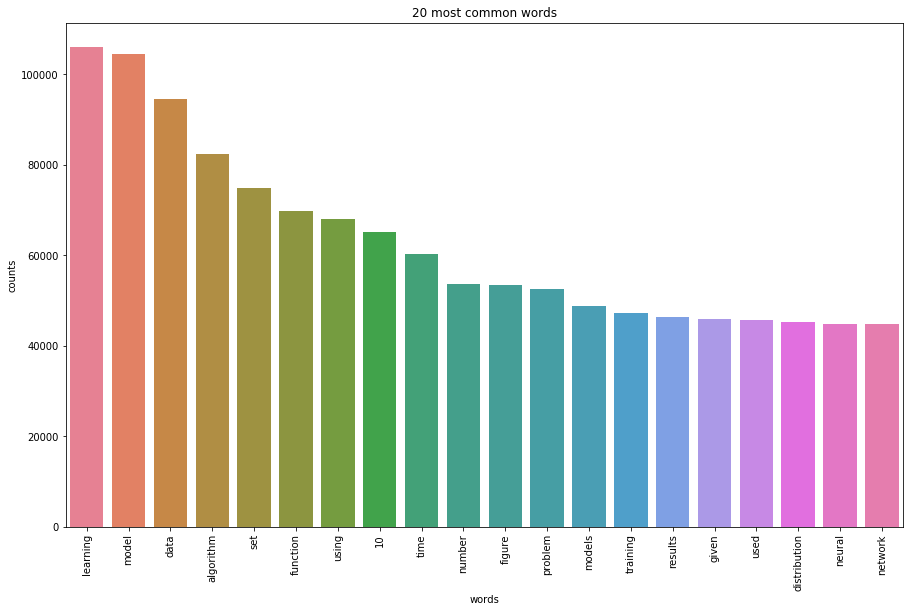

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

words = cv.get_feature_names()
total_counts = np.zeros(len(words))
for t in count:
    total_counts+=t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

# plot
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='20 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

# Step3: Perform LDA (pass the BagOfWords)

In [31]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

number_of_topics = 5
number_of_words = 10

lda = LDA(n_components=number_of_topics, n_jobs=1)
lda.fit(count)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

# Step4: Display Topics

In [35]:
words = cv.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([words[i]
                    for i in topic.argsort()[:-number_of_words - 1:-1]]))


Topic #0:
model algorithm set graph models tree number node nodes probability

Topic #1:
model network neural input figure time networks image learning using

Topic #2:
learning training data set model using classification features 10 algorithm

Topic #3:
data matrix algorithm function 10 log problem gaussian distribution model

Topic #4:
learning state algorithm policy time function value action optimal regret
